<a href="https://colab.research.google.com/github/serafinazhang/War-Game-Comparison/blob/main/COIN_Series_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COIN Series Comparison**

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt 
from google.colab import files, drive
import math
import os
from scipy.linalg import svd
from pathlib import Path
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install pdfplumber
import pdfplumber

     |████████████████████████████████| 46 kB 2.1 MB/s 
     |████████████████████████████████| 5.6 MB 6.3 MB/s 
     |████████████████████████████████| 3.1 MB 42.1 MB/s 
     |████████████████████████████████| 139 kB 47.6 MB/s 
     |████████████████████████████████| 3.6 MB 35.6 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.6.0-py3-none-any.whl size=33688 sha256=0af779e5281a1d9adad466b9383b89db516233e01961af194939a554625112ec
  Stored in directory: /root/.cache/pip/wheels/58/56/fe/2e93d842ffa9ea97746c1ab253d43502ed61c0689361a0224e
Successfully built pdfplumber
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is inc

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nltk
import nltk 
nltk.download("all") 
from nltk import sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [ ]:
!pip install gensim
import gensim
from gensim.models import Word2Vec

# 1 Data Loading

In [ ]:
path1 = '/content/drive/MyDrive/information retrieval/war game'
path2 = '/content/drive/MyDrive/Final Thesis/rule book'

## 1.1 War Game Rule

In [ ]:
game_path = []
for root, dirs, files_name in os.walk(path1):
  for file in files_name:
    game = os.path.join(root,file)
    game_path.append(game)

In [ ]:
len(game_path)

146

In [ ]:
x0 = 0    # Distance of left side of character from left side of page.
x1 = 0.5  # Distance of right side of character from left side of page.
y0 = 0  # Distance of bottom of character from bottom of page.
y1 = 1  # Distance of top of character from bottom of page.

text_list = []
for g in range(len(game_path)):
  with pdfplumber.open(Path(game_path[g])) as pdf:
    all_content = []
    for i, page in enumerate(pdf.pages):
      width = page.width
      height = page.height

        # Crop pages
      left_bbox = (x0*float(width), y0*float(height), x1*float(width), y1*float(height))
      page_crop = page.crop(bbox=left_bbox)
      left_text = page_crop.extract_text()

      left_bbox = (0.5*float(width), y0*float(height), 1*float(width), y1*float(height))
      page_crop = page.crop(bbox=left_bbox)
      right_text = page_crop.extract_text()
      page_context = '\n'.join([left_text, right_text])
      all_content.append(page_context)
  text_list.append(all_content) 

In [ ]:
def combine(text_l): # text_list[0]
  t = text_l[0]
  for i in text_l[1:]:
    t = t + ' ' + i
  return t

In [ ]:
raw_rule = []
for i in text_list:
  rule = combine(i)
  raw_rule.append(rule)

In [ ]:
rule_array = np.array(raw_rule)

In [ ]:
np.save('/content/drive/MyDrive/information retrieval/war_rule.npy', rule_array) 

In [ ]:
rule_array = np.load('/content/drive/MyDrive/information retrieval/war_rule.npy')

In [ ]:
raw_rule = list(rule_array)

## 1.2 COIN Series Rule

In [ ]:
game_path = []
name = []
for root, dirs, files_name in os.walk(path2):
  for file in files_name:
    game = os.path.join(root,file)
    game_path.append(game)
    name.append(file[:-4])

In [ ]:
name.remove('Ariovistus')

In [ ]:
x0 = 0    # Distance of left side of character from left side of page.
x1 = 0.5  # Distance of right side of character from left side of page.
y0 = 0  # Distance of bottom of character from bottom of page.
y1 = 1  # Distance of top of character from bottom of page.

text_list = []
for g in range(len(game_path)):
  with pdfplumber.open(Path(game_path[g])) as pdf:
    all_content = []
    for i, page in enumerate(pdf.pages):
      width = page.width
      height = page.height

        # Crop pages
      left_bbox = (x0*float(width), y0*float(height), x1*float(width), y1*float(height))
      page_crop = page.crop(bbox=left_bbox)
      left_text = page_crop.extract_text()

      left_bbox = (0.5*float(width), y0*float(height), 1*float(width), y1*float(height))
      page_crop = page.crop(bbox=left_bbox)
      right_text = page_crop.extract_text()
      page_context = '\n'.join([left_text, right_text])
      all_content.append(page_context)
  text_list.append(all_content) 

In [ ]:
def combine2(text_l): # text_list[0]
  t = text_l[1]
  for i in text_l[2:]:
    t = t + ' ' + i
  return t

In [ ]:
coin_rule = []
for i in text_list:
  rule = combine2(i)
  coin_rule.append(rule)

In [ ]:
coin_array = np.array(coin_rule)
np.save('/content/drive/MyDrive/information retrieval/coin_rule.npy', coin_array) 

In [ ]:
coin_array = np.load('/content/drive/MyDrive/information retrieval/coin_rule.npy')

In [ ]:
coin_rule = list(coin_array)

# 2 Query Extraction

## 2.1 Text Cleaning

In [ ]:
sentences = [] # each description as a doc
for i in raw_rule:
    s = sent_tokenize(i)
    sentences.append(s)

In [ ]:
# tokenization
token_list= []
for i in sentences: # i is comment level
    for j in i:
      tokens = word_tokenize(j)
      words = [word for word in tokens if word.isalpha()]
      words = [word.lower() for word in words]
      token_list.append(words)

In [ ]:
# lemmatization
lemmatizer = WordNetLemmatizer() 
def pos_tagger(nltk_tag): 
    if nltk_tag.startswith('J'): 
        return wordnet.ADJ 
    elif nltk_tag.startswith('V'): 
        return wordnet.VERB 
    elif nltk_tag.startswith('N'): 
        return wordnet.NOUN 
    elif nltk_tag.startswith('R'): 
        return wordnet.ADV 
    else:           
        return None
lemma_list = []
for i in token_list:
  pos_tagged = nltk.pos_tag(i)
  wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
  lemma = [] 
  for word, tag in wordnet_tagged:
    if word == "i":
      continue
    if tag is None: 
      # if there is no available tag, append the token as is 
      lemma.append(word) 
    else:         
      # else use the tag to lemmatize the token 
      lemma.append(lemmatizer.lemmatize(word, tag))
  lemma_list.append(lemma)

## 2.2 Aspect Extraction

In [ ]:
bi = []
for item in lemma_list:
  grams = [item[i:i+2] for i in range(len(item)-2+1)]
  bigrams = [' '.join(j) for j in grams]
  bi.append(bigrams)

In [ ]:
bi_v = [bigram for i in bi for bigram in i]
uni_v = [unigram for i in lemma_list for unigram in i]

In [ ]:
counter_bi = Counter(bi_v)
counter_uni = Counter(uni_v)

In [ ]:
# filter before computing for less noise
for i in list(counter_bi.keys()):
  if i.split()[0] in stopwords.words('english'):
    if i.split()[1] in stopwords.words('english'):
      counter_bi.pop(i)

In [ ]:
for i in list(counter_bi.keys()):
  w,t = nltk.pos_tag(i.split())[0]
  w1,t1 = nltk.pos_tag(i.split())[1]
  if t[0] != "N":
    if t1[0] != "N":
      counter_bi.pop(i)

In [ ]:
def pmi_index(bigram):
  a, b = bigram.split()
  pmi = math.log(counter_bi[bigram]/((counter_uni[a]-counter_bi[bigram])*(counter_uni[b]-counter_bi[bigram])/(len(uni_v)-counter_bi[a])))
  return pmi

In [ ]:
counter_b = counter_bi.most_common(100)

In [ ]:
bi_gram_list = [k for (k,v) in counter_b]

In [ ]:
frequency = [v for (k,v) in counter_b]

In [ ]:
pmi = [pmi_index(k) for (k,v) in counter_b]

In [ ]:
fre_df = pd.DataFrame({"bigram":bi_gram_list, "pmi":pmi, "frequency": frequency})

In [ ]:
fre_most = fre_df.sort_values(by="pmi", ascending=False).head(50)
fre_most

,bigram,pmi,frequency
15,game llc,8.764710,2370
69,design note,7.513813,1082
21,the following,7.424699,2198
79,minor country,7.394852,1003
65,supply source,7.172061,1124
12,die roll,6.303388,2664
85,step loss,5.634564,973
38,t game,5.533615,1647
61,victory point,5.343196,1167
90,part of,5.195923,949


In [ ]:
select = fre_most.drop([15, 38, 89, 86, 7, 28, 88, 55, 9, 4, 70, 47, 68], axis = 0)
select_bi = select["bigram"]

In [ ]:
bi_dict = defaultdict(list)
for bi in select_bi:
  f,s = bi.split()
  bi_dict[f].append(s)

In [ ]:
sent_c = []
for sent in lemma_list: 
  if len(sent) > 1:
    sent_list = []
    for i in range(len(sent)-1):
      if sent[i] in list(bi_dict.keys()):
        if sent[i+1] in bi_dict[sent[i]]:
          bi = sent[i] + " " + sent[i+1]
          sent_list.append(bi)
        else:
          if sent[i] not in stopwords.words('english'):
            sent_list.append(sent[i])  
      else:
        if sent[i] not in stopwords.words('english'):
          sent_list.append(sent[i]) 
    sent_c.append(sent_list)
  elif len(sent) == 1:
    if sent[0] not in stopwords.words('english'):
      sent_c.append(sent)
    else:
      sent_c.append([])
  else:
    sent_c.append([])

In [ ]:
sent1 = [] # game level
for c in sentences:
  ll = []
  for s in c:
    tokens = word_tokenize(s)
    words = [word for word in tokens if word.isalpha()]
    words = [word.lower() for word in words]
    words = [word for word in words if word != 'i']
    ll.append(words)
  sent1.append(ll)

In [ ]:
num_com = len(sentences)

In [ ]:
com_sent = [] # basic list is sentence
count = 0
for i in range(num_com):
  end = count + len(sent1[i])
  cc = sent_c[count:end]
  com_sent.append(cc)
  count = end

In [ ]:
rule = [] # basic list is rule
for com in com_sent:
  c = []
  for sent in com:
    for wor in sent:
      c.append(wor)
  rule.append(c)

In [ ]:
noun = []
for r in rule:
  c = []
  for wor in r:
    if wor in select_bi:
      c.append(wor)
    else:
      w, t = nltk.pos_tag([wor])[0]
      if t[0] == "N":
        c.append(wor)
  noun.append(c)

In [ ]:
words = [wor for c in noun for wor in c]

In [ ]:
v_n = [n for n,c in Counter(words).most_common(500)]

In [ ]:
df = pd.DataFrame({"text":rule})
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x]))
vectorizer = TfidfVectorizer(vocabulary=v_n, ngram_range=(1,2))
TF_IDF = vectorizer.fit_transform(df['text'].values)
TF_IDF_array = TF_IDF.toarray()

In [ ]:
sum = np.sum(TF_IDF_array,axis=0).tolist()

In [ ]:
rank = pd.DataFrame({"feature":vectorizer.get_feature_names(),"index": sum}).sort_values("index", ascending=False).head(50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
rank.head(50)

,feature,index
0,unit,50.346701
1,hex,20.618702
2,player,19.857379
11,game,14.507899
5,card,13.786489
4,combat,11.350398
10,turn,11.280000
6,marker,10.751649
3,attack,10.518392
12,roll,10.169026


In [ ]:
aspects = rank.drop([0, 2, 11, 5, 10, 6, 9, 8, 93, 17, 13, 50, 35, 22, 24, 36, 30, 42, 33,38, 28, 134, 40, 44], axis=0)['feature']

In [ ]:
aspects

1           hex
4        combat
3        attack
12         roll
7          move
19        enemy
14     movement
18        point
34          map
16       supply
32         area
15        force
23         army
27       battle
45       leader
26        space
29      retreat
104         end
20      control
48       target
31         side
66     defender
49      command
161         die
88     attacker
83     infantry
Name: feature, dtype: object

## 2.3 Query Expansion

In [ ]:
www = [word for item in sent_c for word in item]
len(Counter(www).keys())

31028

In [ ]:
def skip(sent, n=3, s=2):
  k_grams = []
  for i in range(len(sent)):
    for z in range(s):
      seq = [sent[i]] + sent[i+z+1:i+z+n]
      if len(seq) == n and seq not in k_grams:
        k_grams.append(list(seq))
  return k_grams  

In [ ]:
sent_c1 = [sent for sent in sent_c if sent != []]

In [ ]:
sequences = []
for i in sent_c1:
  l = skip(i)
  sequences.append(l)

In [ ]:
sequences = [sent for sent in sequences if sent != []]
seq = [s for sent in sequences for s in sent]

In [ ]:
seq[:10]

[['grand', 'tactical', 'table'],
 ['grand', 'table', 'content'],
 ['tactical', 'table', 'content'],
 ['summary', 'description', 'the game'],
 ['summary', 'the game', 'game'],
 ['description', 'the game', 'game'],
 ['description', 'game', 'read'],
 ['the game', 'game', 'read'],
 ['the game', 'read', 'counter'],
 ['game', 'read', 'counter']]

In [ ]:
model = Word2Vec(seq, min_count=50)

In [ ]:
word = 'movement'
model.wv.most_similar(positive=word)

[('ment', 0.7129577398300171),
 ('movement phase', 0.5347548127174377),
 ('redeployment', 0.4986381530761719),
 ('prohibition', 0.4941112697124481),
 ('mp', 0.4906054139137268),
 ('mf', 0.4772433638572693),
 ('move', 0.4722045361995697),
 ('connection', 0.4671792685985565),
 ('tegic', 0.4647045433521271),
 ('airmobile', 0.46397799253463745)]

In [ ]:
aspect_c = defaultdict(list)
for i in aspects:
  similar = model.wv.most_similar(positive=i)
  for w, s in similar:
    aspect_c[i].append(w)

In [ ]:
category = dict(aspect_c)

In [ ]:
category

{'area': ['hex',
  'location',
  'region',
  'territory',
  'zone',
  'space',
  'country',
  'uncontested',
  'duchy',
  'unoccupied'],
 'army': ['corp',
  'corps',
  'armies',
  'leven',
  'homeland',
  'longstreet',
  'subordinate',
  'fe',
  'brigade',
  'liège'],
 'attack': ['tack',
  'df',
  'airstrike',
  'assaulting',
  'defend',
  'combat',
  'fense',
  'attacking',
  'tacking',
  'strafe'],
 'attacker': ['tacker',
  'defender',
  'the defender',
  'the attacker',
  'fender',
  'defending',
  'loser',
  'bouncer',
  'shifts',
  'forego'],
 'battle': ['bat',
  'combat',
  'disaster',
  'siege',
  'aftermath',
  'loser',
  'winning',
  'napoleon',
  'audacity',
  'skirmish'],
 'combat': ['bat',
  'antiaircraft',
  'dmr',
  'bombardment',
  'df',
  'attack',
  'halving',
  'ranged',
  'overruns',
  'airdrops'],
 'command': ['mand',
  'commanding',
  'plt',
  'subordinate',
  'oc',
  'pw',
  'activation',
  'activate',
  'mands',
  'activated'],
 'control': ['trol',
  'troll',
  '

In [ ]:
category = {'area': ['hex', 'location', 'region', 'territory', 'zone', 'space', 'country', 'uncontested', 'duchy', 'unoccupied'],
            'army': ['corp', 'corps', 'armies', 'leven', 'homeland', 'longstreet', 'subordinate', 'fe', 'brigade', 'liège'],
            'attack': ['tack', 'df', 'airstrike', 'assaulting', 'defend', 'combat', 'fense', 'attacking', 'tacking', 'strafe'],
            'attacker': ['tacker', 'defender', 'the defender', 'the attacker', 'fender', 'defending', 'loser', 'bouncer', 'shifts', 'forego'],
            'battle': ['bat', 'combat', 'disaster', 'siege', 'aftermath', 'loser', 'winning', 'napoleon', 'audacity', 'skirmish'],
            'combat': ['bat', 'antiaircraft', 'dmr', 'bombardment', 'df', 'attack', 'halving', 'ranged', 'overruns', 'airdrops'],
            'command': ['mand', 'commanding', 'plt', 'subordinate', 'oc', 'pw', 'activation', 'activate', 'mands', 'activated'],
            'control': ['trol', 'troll', 'recapture', 'controlled', 'trolled', 'trols', 'pied', 'capture', 'conquered', 'ling'],
            'defender': ['attacker', 'tacker', 'the defender', 'the attacker', 'defending', 'fender', 'defend', 'loser', 'dt', 'beneficial'],
            'die': ['die roll', 'dice', 'roll', 'unmodified', 'reroll', 'modified', 'a die', 'sar', 'rnc', 'severity'],
            'end': ['conclude', 'end of', 'conclusion', 'begin', 'finish', 'strat', 'earlier', 'continue', 'impulses', 'armistice'],
            'enemy': ['emy', 'enemy unit', 'opposing', 'detected', 'friendly', 'zoi', 'evading', 'fzs', 'an enemy', 'retreating'],
            'force': ['tfs', 'coordinating', 'merchantman', 'forced', 'fleet', 'nas', 'army', 'carrier', 'expedition', 'hiryu'],
            'hex': ['hexes', 'orchard', 'uncontested', 'connecting', 'containing', 'hexsides', 'polder', 'hexside', 'area', 'vacant'],
            'infantry': ['fantry', 'infantry unit', 'cuirassier', 'bicycle', 'jaeger', 'panzergrenadier', 'mech', 'inf', 'cav', 'paratroop'],
            'leader': ['brock', 'mander', 'samurai', 'cu', 'tecumseh', 'subordinate', 'cornwallis', 'hanno', 'commander', 'crusader'],
            'map': ['superimpose', 'mapboards', 'grid', 'compass', 'board', 'edge', 'hexagon', 'regulate', 'convenient', 'mapsheet'],
            'move': ['reposition', 'enter', 'vated', 'travel', 'activated', 'activate', 'exit', 'drop', 'redeploy', 'moving'],
            'movement': ['ment', 'movement phase', 'redeployment', 'mp', 'zoi', 'mf', 'entrain', 'prohibition', 'exploitation', 'tegic'],
            'point': ['bps', 'xps', 'ep', 'dep', 'unspent', 'eps', 'xp', 'pp', 'gop', 'fixed'],
            'retreat': ['overstacking', 'overstack', 'dmr', 'vacate', 'aac', 'elimination', 'survivor', 'involuntarily','overwhelm', 'overstacked'],
            'roll': ['unmodified', 'a die', 'modified', 'die', 'sar', 'die roll', 'modifies', 'consult', 'dr', 'rolling'],
            'side': ['flip', 'villeneuve', 'flipped', 'backside', 'committed', 'er', 'debater', 'reverse', 'undetected', 'asu'],
            'space': ['region', 'unbesieged', 'ravage', 'duchy', 'territory', 'unoccupied', 'provincial', 'province', 'uncontrolled', 'argo'],
            'supply': ['ply', 'overland', 'isolate', 'continuous', 'isolated', 'communication', 'oos', 'tracing', 'unsupplied', 'comm'],
            'target': ['incendiary', 'firer', 'the target', 'firing', 'targeting', 'strafe', 'strafing', 'detected', 'sam', 'targeted']}

In [ ]:
category = {'area': ['hex', 'location', 'region', 'territory', 'zone', 'space', 'country', 'uncontested', 'duchy', 'unoccupied','hex', 'hexes', 'orchard', 'uncontested', 'connecting', 'containing', 'hexsides', 'polder', 'hexside', 'vacant', 'region', 'unbesieged', 'ravage', 'duchy', 'territory', 'unoccupied', 'provincial', 'province', 'uncontrolled', 'argo'],
            'attack': ['tack', 'df', 'airstrike', 'assaulting', 'defend', 'combat', 'fense', 'attacking', 'tacking', 'strafe', 'bat', 'antiaircraft', 'dmr', 'bombardment', 'df', 'attack', 'halving', 'ranged', 'overruns', 'airdrops', 'battle', 'bat', 'disaster', 'siege', 'aftermath', 'loser', 'winning', 'napoleon', 'audacity', 'skirmish'],
            'attacker': ['tacker', 'defender', 'the defender', 'the attacker', 'fender', 'defending', 'loser', 'bouncer', 'shifts', 'forego', 'defender', 'attacker', 'tacker', 'the defender', 'the attacker', 'defending', 'fender', 'defend', 'loser', 'dt', 'beneficial'],
            'command': ['mand', 'commanding', 'plt', 'subordinate', 'oc', 'pw', 'activation', 'activate', 'mands', 'activated'],
            'control': ['trol', 'troll', 'recapture', 'controlled', 'trolled', 'trols', 'pied', 'capture', 'conquered', 'ling'],
            'die': ['die roll', 'dice', 'roll', 'unmodified', 'reroll', 'modified', 'a die', 'sar', 'rnc', 'severity', 'unmodified', 'a die', 'modified', 'die', 'sar', 'die roll', 'modifies', 'consult', 'dr', 'rolling'],
            'end': ['conclude', 'end of', 'conclusion', 'begin', 'finish', 'strat', 'earlier', 'continue', 'impulses', 'armistice'],
            'enemy': ['emy', 'enemy unit', 'opposing', 'detected', 'friendly', 'zoi', 'evading', 'fzs', 'an enemy', 'retreating'],
            'force': ['tfs', 'coordinating', 'merchantman', 'forced', 'fleet', 'nas', 'army', 'carrier', 'expedition', 'hiryu', 'corp', 'corps', 'armies', 'leven', 'homeland', 'longstreet', 'subordinate', 'fe', 'brigade', 'liège'],
            'infantry': ['fantry', 'infantry unit', 'cuirassier', 'bicycle', 'jaeger', 'panzergrenadier', 'mech', 'inf', 'cav', 'paratroop'],
            'leader': ['brock', 'mander', 'samurai', 'cu', 'tecumseh', 'subordinate', 'cornwallis', 'hanno', 'commander', 'crusader'],
            'map': ['superimpose', 'mapboards', 'grid', 'compass', 'board', 'edge', 'hexagon', 'regulate', 'convenient', 'mapsheet'],
            'movement': ['ment', 'movement phase', 'redeployment', 'mp', 'zoi', 'mf', 'entrain', 'prohibition', 'exploitation', 'tegic', 'move', 'reposition', 'enter', 'vated', 'travel', 'activated', 'activate', 'exit', 'drop', 'redeploy', 'moving'],
            'point': ['bps', 'xps', 'ep', 'dep', 'unspent', 'eps', 'xp', 'pp', 'gop', 'fixed'],
            'retreat': ['overstacking', 'overstack', 'dmr', 'vacate', 'aac', 'elimination', 'survivor', 'involuntarily','overwhelm', 'overstacked'],
            'side': ['flip', 'villeneuve', 'flipped', 'backside', 'committed', 'er', 'debater', 'reverse', 'undetected', 'asu'],
            'supply': ['ply', 'overland', 'isolate', 'continuous', 'isolated', 'communication', 'oos', 'tracing', 'unsupplied', 'comm'],
            'target': ['incendiary', 'firer', 'the target', 'firing', 'targeting', 'strafe', 'strafing', 'detected', 'sam', 'targeted']}

In [ ]:
for (a, s) in category.items():
  for wor in s:
    w,t = nltk.pos_tag([wor])[0]
    if t[0] != 'N':
      category[a].remove(wor)

In [ ]:
for k in category.keys():
  category[k].append(k)

In [ ]:
c_v = [wor for k,v in category.items() for wor in v]

In [ ]:
dd = [] # the cleaned description collection
for com in com_sent:
  ccc = []
  for sent in com:
    ss = []
    for wor in sent:
      if wor not in c_v:
        ss.append(wor)
      else:
        for k in category.keys():
          if wor in category[k]:
            ss.append(k)
    ccc.append(ss)
  dd.append(ccc)

In [ ]:
ddd = [] # rule as items
for i in dd:
  sss = []
  for j in i:
    if j != []:
      sss.append(j)
  ddd.append(sss)

# 3 COIN SERIES

## 3.1 Text Cleaning

In [ ]:
sentences = [] # each description as a doc
for i in coin_rule:
    s = sent_tokenize(i)
    sentences.append(s)

In [ ]:
# tokenization
token_list= []
for i in sentences: # i is comment level
    for j in i:
      tokens = word_tokenize(j)
      words = [word for word in tokens if word.isalpha()]
      words = [word.lower() for word in words]
      token_list.append(words)

In [ ]:
# lemmatization
lemmatizer = WordNetLemmatizer() 
def pos_tagger(nltk_tag): 
    if nltk_tag.startswith('J'): 
        return wordnet.ADJ 
    elif nltk_tag.startswith('V'): 
        return wordnet.VERB 
    elif nltk_tag.startswith('N'): 
        return wordnet.NOUN 
    elif nltk_tag.startswith('R'): 
        return wordnet.ADV 
    else:           
        return None
lemma_list = []
for i in token_list:
  pos_tagged = nltk.pos_tag(i)
  wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
  lemma = [] 
  for word, tag in wordnet_tagged:
    if word == "i":
      continue
    if tag is None: 
      # if there is no available tag, append the token as is 
      lemma.append(word) 
    else:         
      # else use the tag to lemmatize the token 
      lemma.append(lemmatizer.lemmatize(word, tag))
  lemma_list.append(lemma)

In [ ]:
bi = []
for item in lemma_list:
  grams = [item[i:i+2] for i in range(len(item)-2+1)]
  bigrams = [' '.join(j) for j in grams]
  bi.append(bigrams)

In [ ]:
bi_v = [bigram for i in bi for bigram in i]
uni_v = [unigram for i in lemma_list for unigram in i]

In [ ]:
counter_bi = Counter(bi_v)
counter_uni = Counter(uni_v)

In [ ]:
# filter before computing for less noise
for i in list(counter_bi.keys()):
  if i.split()[0] in stopwords.words('english'):
    if i.split()[1] in stopwords.words('english'):
      counter_bi.pop(i)

In [ ]:
for i in list(counter_bi.keys()):
  w,t = nltk.pos_tag(i.split())[0]
  w1,t1 = nltk.pos_tag(i.split())[1]
  if t[0] != "N":
    if t1[0] != "N":
      counter_bi.pop(i)

In [ ]:
def pmi_index(bigram):
  a, b = bigram.split()
  try:
    pmi = math.log(counter_bi[bigram]/((counter_uni[a]-counter_bi[bigram])*(counter_uni[b]-counter_bi[bigram])/(len(uni_v)-counter_bi[a])))
  except ZeroDivisionError:
    pmi = 100
  return pmi

In [ ]:
counter_b = counter_bi.most_common(100)

In [ ]:
bi_gram_list = [k for (k,v) in counter_b]

In [ ]:
frequency = [v for (k,v) in counter_b]

In [ ]:
pmi = [pmi_index(k) for (k,v) in counter_b]

In [ ]:
fre_df = pd.DataFrame({"bigram":bi_gram_list, "pmi":pmi, "frequency": frequency})

In [ ]:
fre_most = fre_df.sort_values(by="pmi", ascending=False).head(50)
fre_most

,bigram,pmi,frequency
52,the following,100.000000,104
17,muslim league,11.992768,190
6,game llc,10.554140,319
23,war party,10.429434,155
0,special activity,9.406484,679
57,design note,8.915134,102
68,draw deck,8.497223,93
40,pivotal event,7.708811,117
32,victory margin,7.493477,126
15,t game,7.170651,200


In [ ]:
select = fre_most.drop([6, 68, 15, 14, 25, 48, 60, 36, 7, 43, 21, 11, 41, 91, 45, 1, 61, 4, 70, 95, 69, 81, 13, 12, 71, 58], axis = 0)
select_bi = select["bigram"]

In [ ]:
bi_dict = defaultdict(list)
for bi in select_bi:
  f,s = bi.split()
  bi_dict[f].append(s)

In [ ]:
sent_c = []
for sent in lemma_list: 
  if len(sent) > 1:
    sent_list = []
    for i in range(len(sent)-1):
      if sent[i] in list(bi_dict.keys()):
        if sent[i+1] in bi_dict[sent[i]]:
          bi = sent[i] + " " + sent[i+1]
          sent_list.append(bi)
        else:
          if sent[i] not in stopwords.words('english'):
            sent_list.append(sent[i])  
      else:
        if sent[i] not in stopwords.words('english'):
          sent_list.append(sent[i]) 
    sent_c.append(sent_list)
  elif len(sent) == 1:
    if sent[0] not in stopwords.words('english'):
      sent_c.append(sent)
    else:
      sent_c.append([])
  else:
    sent_c.append([])

In [ ]:
coin_book = []
n = 0
num = 0
for i in range(11):
  r = []
  n = num
  num = n + len(sentences[i])
  for m in range(n, num):
    r.append(sent_c[m])
  
  coin_book.append(r)

In [ ]:
sent1 = []
for i in coin_book:
  c = []
  for sen in i:
    cc = []
    if len(sen) >1 :
      for wor in sen:
        if len(wor) > 1:
          cc.append(wor)
    c.append(cc)
  sent1.append(c)

## 3.2 Semantic Meaning

In [ ]:
tutto = ddd + sent1

In [ ]:
all_sent = [sent for rule in tutto for sent in rule]

In [ ]:
all_sent = [sent for sent in all_sent if sent != []]

In [ ]:
def skip(sent, n=3, s=2):
  k_grams = []
  for i in range(len(sent)):
    for z in range(s):
      seq = [sent[i]] + sent[i+z+1:i+z+n]
      if len(seq) == n and seq not in k_grams:
        k_grams.append(list(seq))
  return k_grams  

In [ ]:
sequences = []
for i in all_sent:
  l = skip(i)
  sequences.append(l)

In [ ]:
sequences = [sent for sent in sequences if sent != []]
seq = [s for sent in sequences for s in sent]

In [ ]:
model = Word2Vec(seq, min_count=50)

In [ ]:
topic = list(category.keys())

In [ ]:
def topic_sent_relatedness(cat):
  re = []
  for ru in coin_full:
    rr = []
    for sent in ru:
      mm = []
      for wor in sent:
        try:
          simm = model.wv.similarity(wor, cat)
        except KeyError:
          simm = 0
        mm.append(abs(simm))
      rr.append(max(mm))
    re.append(rr)
  return re

In [ ]:
coin_full = []
for i in sent1:
  cc = []
  for sent in i:
    if sent != []:
      cc.append(sent)
  coin_full.append(cc)

In [ ]:
all_relat = []
for i in topic:
  re = topic_sent_relatedness(i)
  all_relat.append(re)

In [ ]:
relat_array = np.array(all_relat)
np.array(relat_array,dtype=object).dump(open('/content/drive/MyDrive/information retrieval/topic_relate.npy', 'wb'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
relat_array = np.load('/content/drive/MyDrive/information retrieval/topic_relate.npy', allow_pickle=True)
all_relat = list(relat_array)

In [ ]:
df = pd.DataFrame(columns = topic)

In [ ]:
def counting(n,r):
  count = 0
  for i in all_relat[n][r]:
    if i > 0.5:
      count +=1
  return count

In [ ]:
for t in range(len(topic)):
  tt = topic[t]
  c = []
  for r in range(11):
    c.append(counting(t, r))
  df[tt] = c

In [ ]:
df = df.drop(labels=3, axis=0).reset_index()

In [ ]:
df.index = name

In [ ]:
df = df.drop(['index'], axis = 1)

In [ ]:
df['rule_sum'] = df.sum(axis=1)

In [ ]:
df = df.sort_values('rule_sum', axis=0, ascending=False)

In [ ]:
for col in topic:
  df.loc[df[col] <10, col] = 0

In [ ]:
df['aspect_num'] = list((df != 0).astype(int).sum(axis=1)-1)

In [ ]:
stats = pd.read_csv('/content/drive/MyDrive/Final Thesis/stats.csv', sep =';')

In [ ]:
stats.index = stats['Game Name']

In [ ]:
all = df.join(stats['Complexity'])

In [ ]:
all['Index'] = (all['aspect_num']/10)*(all['rule_sum']/100)/1.5

In [ ]:
all['BGG'] = all['Complexity']

In [ ]:
all = all.sort_values('Complexity', axis = 0, ascending=False)

In [ ]:
all['Game'] = all.index

In [ ]:
all1 = all.sort_values('eva', axis = 0, ascending=False)

In [ ]:
all1['index_rank'] = range(1,11)

In [ ]:
all1 = all1.sort_values('BGG', axis=0, ascending=False)

In [ ]:
all1['BGG_rank'] = range(1,11)

In [ ]:
all1

,area,attack,attacker,command,control,die,end,enemy,force,infantry,leader,map,movement,point,retreat,side,supply,target,rule_sum,aspect_num,Complexity,eva,Game,Index,BGG,index_rank,BGG_rank
Pendragon,0,76,31,113,106,120,41,81,60,73,0,41,0,0,0,0,0,65,833,11,4.45,6.108667,Pendragon,6.108667,4.45,1,1
Gandhi,0,49,19,0,73,117,54,0,39,0,0,29,0,0,0,0,0,18,423,8,4.14,2.256000,Gandhi,2.256000,4.14,6,2
Fire in the Lake,0,98,42,0,85,48,30,60,62,0,20,30,0,0,0,0,28,14,538,11,4.09,3.945333,Fire in the Lake,3.945333,4.09,4,3
Liberty or Death,0,16,16,148,80,45,36,29,54,0,54,29,0,0,0,48,13,0,584,12,4.07,4.672000,Liberty or Death,4.672000,4.07,3,4
Falling Sky,0,18,18,93,89,90,63,62,62,0,77,27,0,0,42,0,34,17,702,13,4.03,6.084000,Falling Sky,6.084000,4.03,2,5
A Distant Plain,0,37,0,0,45,22,25,23,29,0,0,12,0,0,0,0,24,0,242,8,3.82,1.290667,A Distant Plain,1.290667,3.82,10,6
Colonial Twilight,0,30,20,0,35,34,34,15,32,0,0,32,0,0,0,0,0,0,263,8,3.80,1.402667,Colonial Twilight,1.402667,3.80,9,7
Andean Abyss,0,42,16,0,30,19,29,24,38,0,0,20,0,0,0,0,27,18,280,10,3.78,1.866667,Andean Abyss,1.866667,3.78,7,8
Cuba Libre,0,45,21,0,37,18,27,23,32,0,0,12,0,0,0,0,0,21,243,9,3.55,1.458000,Cuba Libre,1.458000,3.55,8,9
All Bridges Burning,0,70,69,97,38,45,20,40,30,0,0,48,0,0,0,11,0,16,512,11,3.39,3.754667,All Bridges Burning,3.754667,3.39,5,10


In [ ]:
from scipy.stats import kendalltau
kendalltau(all1['BGG_rank'],all1['index_rank'])

KendalltauResult(correlation=0.28888888888888886, pvalue=0.2912483465608466)

In [ ]:
import math
def rbo(list1, list2, p=0.9):
   # tail recursive helper function
   def helper(ret, i, d):
       l1 = set(list1[:i]) if i < len(list1) else set(list1)
       l2 = set(list2[:i]) if i < len(list2) else set(list2)
       a_d = len(l1.intersection(l2))/i
       term = math.pow(p, i) * a_d
       if d == i:
           return ret + term
       return helper(ret + term, i + 1, d)
   k = max(len(list1), len(list2))
   x_k = len(set(list1).intersection(set(list2)))
   summation = helper(0, 1, k)
   return ((float(x_k)/k) * math.pow(p, k)) + ((1-p)/p * summation)

In [ ]:
!pip install rbo

In [ ]:
import rbo
rbo.RankingSimilarity(list(all1['index_rank']), list(all1['BGG_rank'])).rbo()

0.756984126984127

In [ ]:
bar =all[['Index', 'BGG', 'Game']]

In [ ]:
bar = bar.melt(id_vars='Game').rename(columns=str.title)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


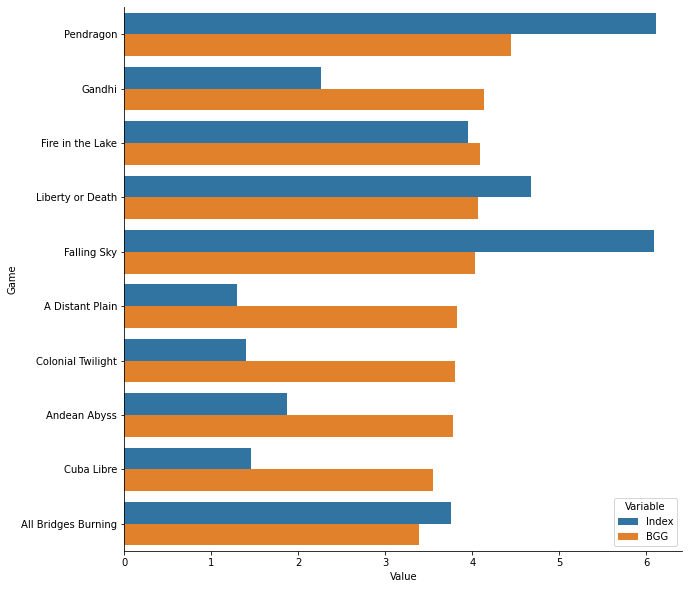

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 10))
sns.barplot(y='Game', x='Value', hue='Variable', data=bar, ax=ax1)
sns.despine(fig)
plt.savefig('barplot.eps', bbox_inches='tight', pad_inches=0.0)

In [ ]:
df = df.T.sort_values(by='Pendragon', axis = 0, ascending=False)

In [ ]:
dff = df.drop(['aspect_num', 'rule_sum'])

In [ ]:
dff.index

Index(['die', 'command', 'control', 'enemy', 'attack', 'infantry', 'target',
       'force', 'end', 'map', 'attacker', 'side', 'supply', 'area', 'retreat',
       'point', 'movement', 'leader'],
      dtype='object')

In [ ]:
new_order = ['die', 'command', 'control', 'enemy', 'attack', 'infantry',
       'target', 'force', 'end', 'map', 'attacker', 'supply', 'leader', 
       'side', 'retreat', 'area', 'point', 'movement']

In [ ]:
dff = dff.reindex(new_order)

In [ ]:
dff.index = ['Die', 'Command', 'Control', 'Enemy', 'Attack', 'Infantry',
       'Target', 'Force', 'End', 'Map', 'Attacker', 'Supply', 'Leader', 
       'Side', 'Retreat', 'Area', 'Point', 'Movement']

In [ ]:
dff['sum'] = dff.sum(axis=1)

In [ ]:
mm =dff.sort_values('sum', axis = 0, ascending=False)

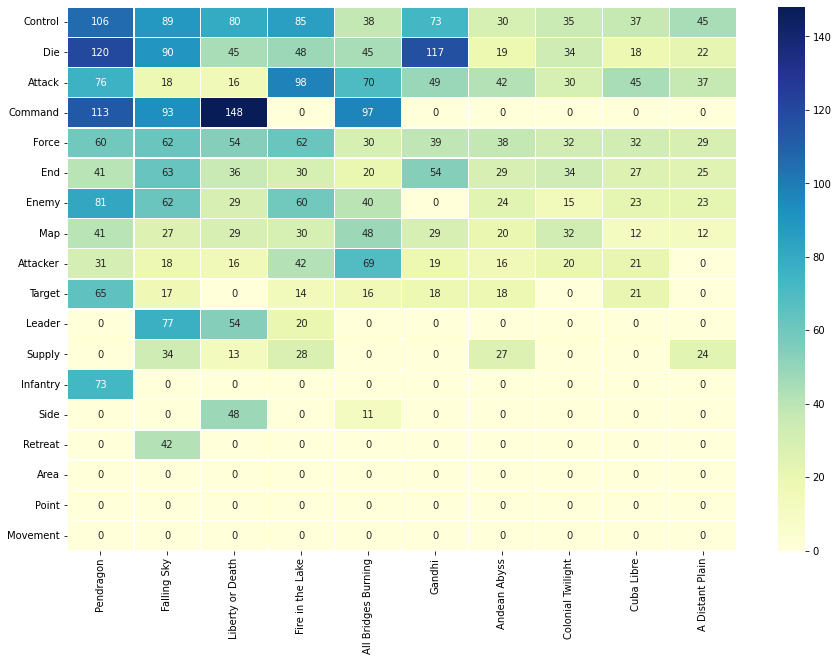

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(mm.drop('sum', axis = 1), annot=True, annot_kws={"size": 10}, fmt='g', linewidths=.5, cmap="YlGnBu")
plt.figure
plt.savefig('heatmap.eps', bbox_inches='tight', pad_inches=0.0)
#plt.savefig('df.eps', bbox_inches='tight', pad_inches=0.0)